Exploring clustering algorithms for segmentation

In [1]:
import numpy as np
from skimage import filters
from skimage import exposure
from skimage import morphology
import matplotlib.pyplot as plt
from skimage.util import invert
from sklearn.metrics import jaccard_score
from skimage.filters import gaussian, laplace, rank, threshold_otsu
from skimage import io, data, img_as_ubyte, img_as_float, segmentation
from scipy.ndimage import convolve, gaussian_filter, median_filter, sobel
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma

from sklearn.cluster import KMeans
from skimage.color import label2rgb
from skimage import io, data, img_as_ubyte
from skimage.color import rgb2hsv, rgb2lab
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.future import graph
from skimage.morphology import disk
from skimage.segmentation import watershed, slic
from skimage.filters import rank
from scipy import ndimage as ndi

In [3]:
# loading image
im = io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/IM/AS_09125_050116000001_A24f00d0_slice1_channel3.tif')

# Loading ground truth (mask)
gt = invert(io.imread('C:/Users/hamma/Desktop/Newcastle University/Data Science/Image Informatics/Project/cells/cytoplasm/GT/AS_09125_050116000001_A24f00d0_slice1_channel3.tif'))

In [6]:
# K-means segmentation on the image

v = np.float32(im.reshape(-1, 1))
print(v.shape)
model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

im_labels[im_labels > 0] = 1

(262144, 1)


C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 4 fits in uint8
  return _convert(image, np.uint8, force_copy)


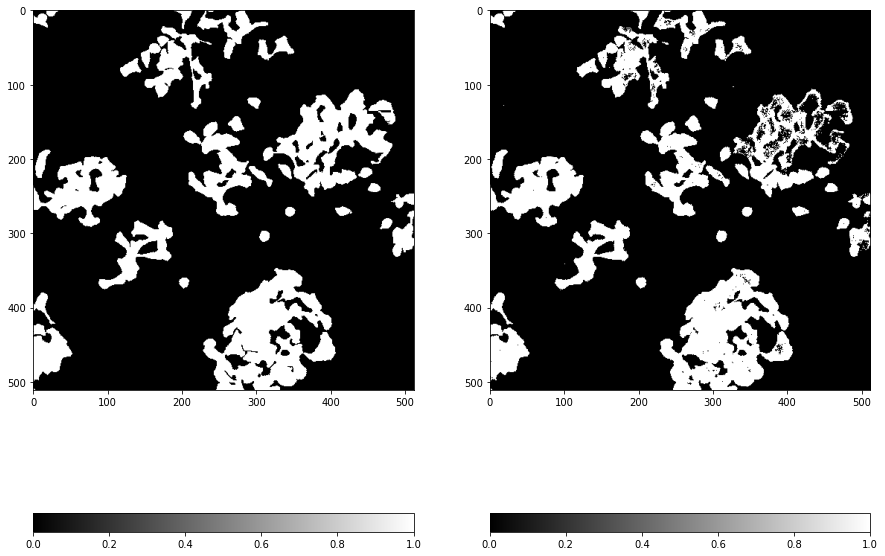

In [7]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [5]:
img_cont = exposure.rescale_intensity(im) ** 1.5

In [14]:
# K-means segmentation on the image

v = np.float32(img_cont.reshape(-1, 1))
print(v.shape)
model = KMeans(n_clusters=13, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

im_labels[im_labels > 0] = 1

(262144, 1)


C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 12 fits in uint8
  return _convert(image, np.uint8, force_copy)


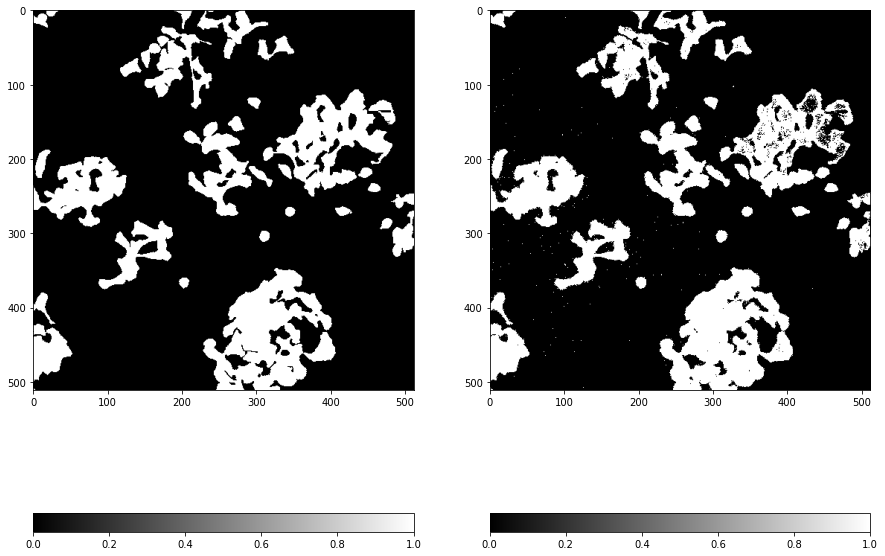

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [17]:
jaccard_score(gt, im_labels, average='micro')

0.885945039171264

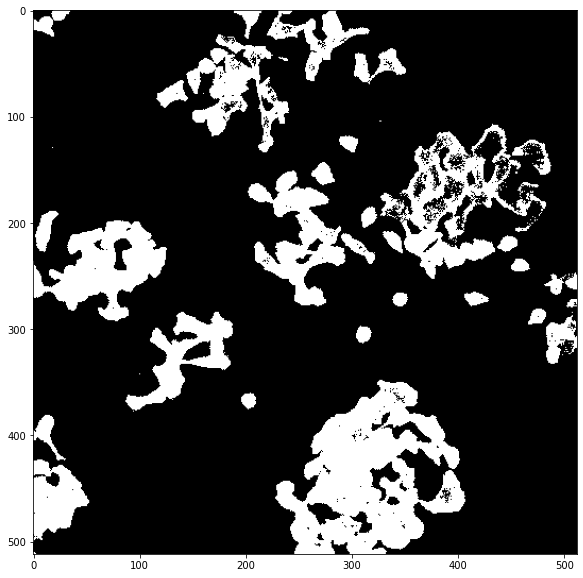

In [41]:
im_labels[im_labels > 0] = 1

plt.figure(figsize=(10, 10))
plt.imshow(im_labels, cmap='gray')

In [8]:
print(jaccard_score(im_labels, gt, average='micro'))

0.8915746488674028


0.8915746488674028


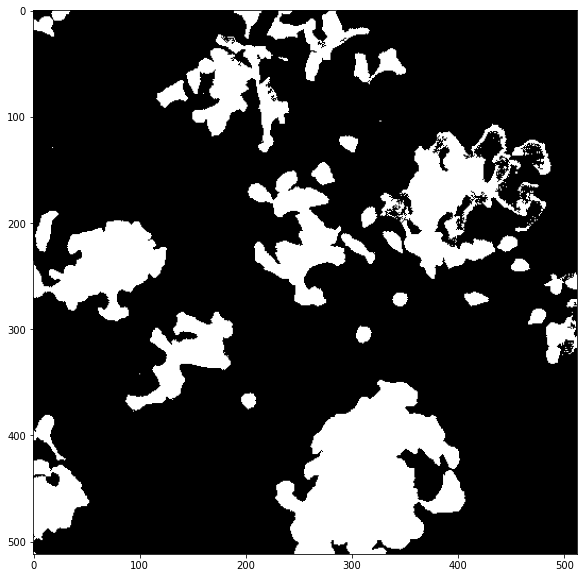

In [46]:
# filling holes in the image and recomputing the jarccard score

seed = np.copy(im_labels)
seed[1:-1, 1:-1] = im_labels.max()
mask = im_labels

filled = morphology.reconstruction(seed, mask, method='erosion')

plt.figure(figsize=(10, 10))
plt.imshow(filled, cmap='gray')

print(jaccard_score(im_labels, gt, average='micro'))

0.9110984165521181


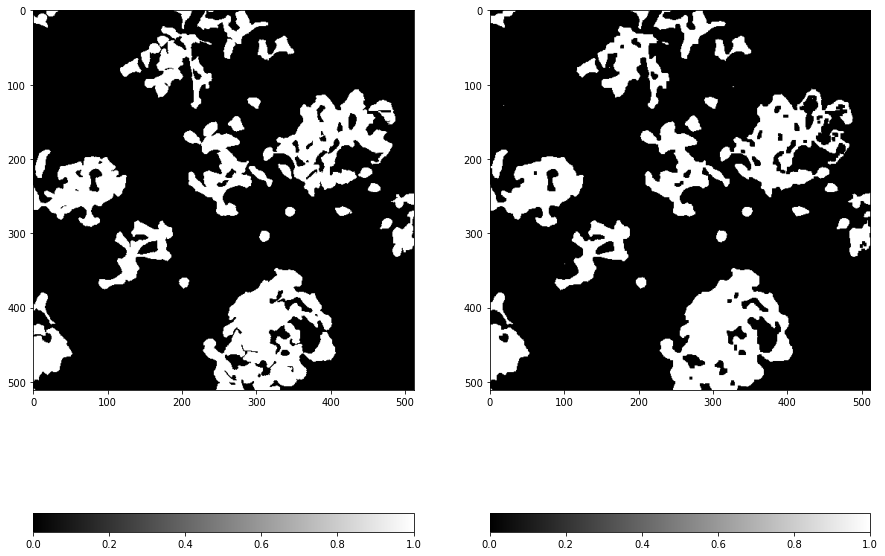

In [52]:
se = morphology.disk(2.5)
imc = morphology.binary_closing(im_labels, se)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imc, cmap='gray')
c = plt.colorbar(orientation='horizontal')

print(jaccard_score(imc, gt, average='micro'))

In [58]:
# k-means segmentation on the image after gamma correction

img_cont = exposure.rescale_intensity(im)

img_gamma_adj = exposure.adjust_gamma(img_cont, 0.6)

v = np.float32(im.reshape(-1, 1))
print(v.shape)
model = KMeans(n_clusters=2, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

(262144, 1)


C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


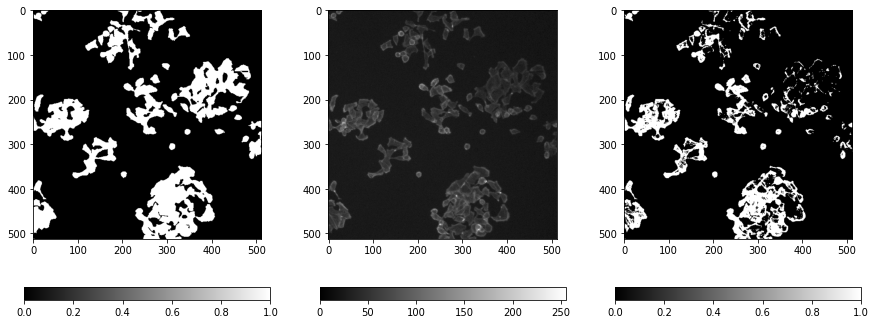

In [59]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(img_gamma_adj, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(im_labels, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [60]:
print(jaccard_score(im_labels, gt, average='micro'))

0.6179401993355482


Birch Clustering

In [58]:
# birch clustering on the image

v = np.float32(im.reshape(-1, 1))
print(v.shape)

model = Birch(n_clusters=5, threshold=1)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(label2rgb(im_labels, bg_label=0))

(262144, 1)


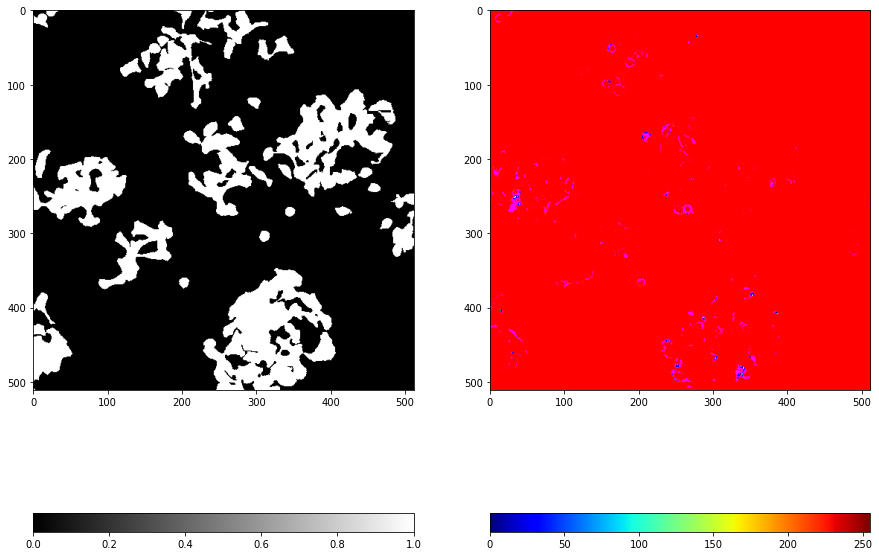

In [59]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='jet')
c = plt.colorbar(orientation='horizontal')

In [ ]:
# agglomerative clustering on the image
# keeps on crashing

v = np.float32(im.reshape(-1, 1))
print(v.shape)

conn = grid_to_graph(*im.shape)
model = AgglomerativeClustering(n_clusters=3, linkage='ward', connectivity=conn)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [ ]:
print(jaccard_score(im_labels, gt, average='micro'))

In [ ]:
# DBSCAN clustering on the image
# Keeps on crashing

v = np.float32(data.camera().reshape(-1, 1))
print(v.shape)

model = DBSCAN(eps=0.3, min_samples=50)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(data.camera(), cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='gray')
c = plt.colorbar(orientation='horizontal')

Multi Otsu's thresholding for segmentation

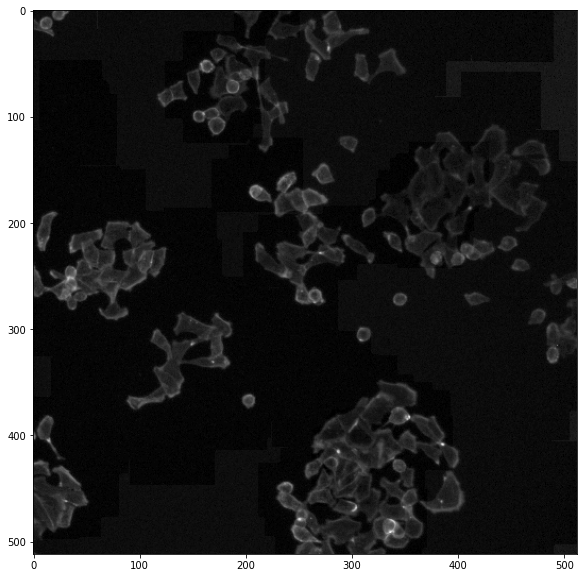

In [22]:
# img preprocessing
img_cont = exposure.rescale_intensity(im)

img_gamma_adj = exposure.adjust_gamma(img_cont, 0.6)

wth = morphology.white_tophat(img_gamma_adj, footprint = morphology.square(50))

plt.figure(figsize=(10, 10))
plt.imshow(wth, cmap='gray')

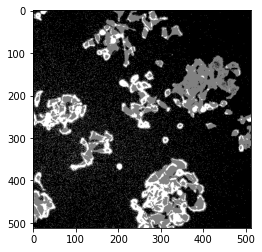

In [30]:
# Multi Otsu thresholding
thresholds = filters.threshold_multiotsu(img_gamma_adj)
regions = np.digitize(img_gamma_adj, bins=thresholds)
plt.imshow(regions, cmap='gray')

In [36]:
# denoising the segmented image
sigma_est = np.mean(estimate_sigma(regions, channel_axis=None))
imd = denoise_nl_means(regions, h=1 * sigma_est, sigma=sigma_est, fast_mode=True)

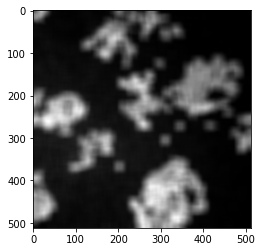

In [38]:
plt.imshow(imd, cmap='gray')

C:\Users\hamma\AppData\Local\Temp/ipykernel_14152/3965058849.py:1: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  plt.imshow(rank.median(regions, footprint=disk(5)), cmap='gray')
C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


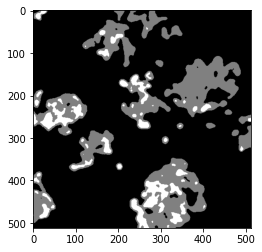

In [49]:
# median filtering on the segmented image
plt.imshow(rank.median(regions, footprint=morphology.square(5)), cmap='gray')

C:\Users\hamma\AppData\Local\Temp/ipykernel_14152/2300458739.py:1: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  imt = rank.median(regions, footprint=disk(2.5))
C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


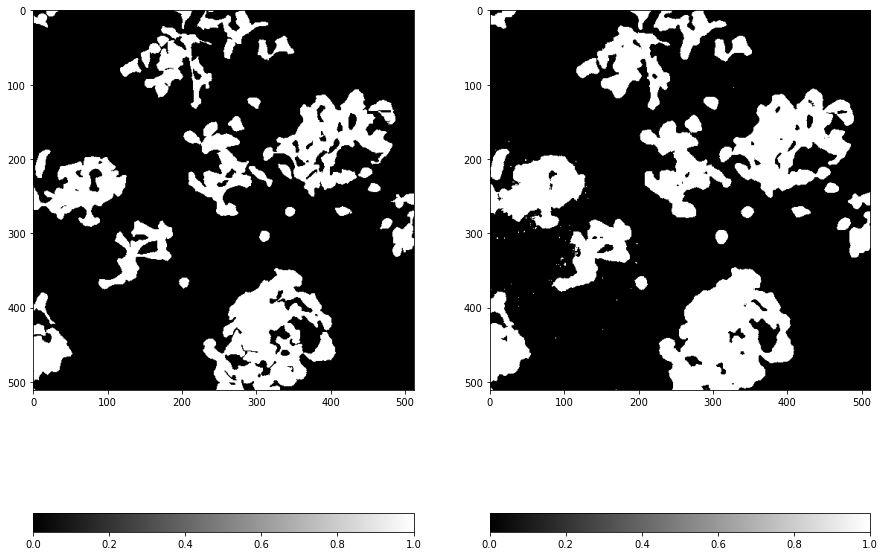

In [52]:
# median filtering on segmented image
imt = rank.median(regions, footprint=disk(2.5))
imt[imt>0] = 1

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(gt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imt, cmap='gray')
c = plt.colorbar(orientation='horizontal')

In [53]:
jaccard_score(imt, gt, average='micro')

0.790242363229306

Mean shift clustering

In [77]:
v = np.float32(im.reshape((-1, 1)))

bandwidth = estimate_bandwidth(v, quantile=.04, n_samples=1000)
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 86 fits in uint8
  return _convert(image, np.uint8, force_copy)


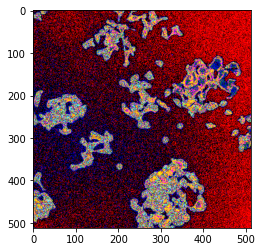

In [78]:
plt.imshow(label2rgb(im_labels, bg_label=0), cmap='jet')

In [80]:
# MeanShift clustering followed by K-means on the image

v = np.float32(im.reshape((-1, 1)))

bandwidth = estimate_bandwidth(v, quantile=.04, n_samples=1000)
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)

v = np.float32(labels.reshape((-1, 1)))
model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(v)
im_labels = labels.reshape(im.shape)
im_labels = img_as_ubyte(im_labels)


C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 86 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 4 fits in uint8
  return _convert(image, np.uint8, force_copy)


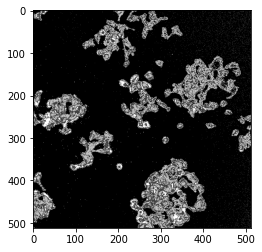

In [83]:
plt.imshow(im_labels, cmap='gray')

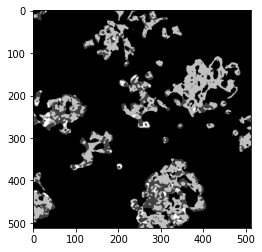

In [85]:
imt = rank.median(im_labels, footprint=morphology.square(5))
plt.imshow(imt, cmap='gray')

0.879985064808065

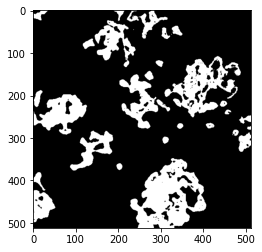

In [87]:
imt[imt>0] = 1
plt.imshow(imt, cmap='gray')
jaccard_score(imt, gt, average='micro')

Graph-cut clustering for segmentation

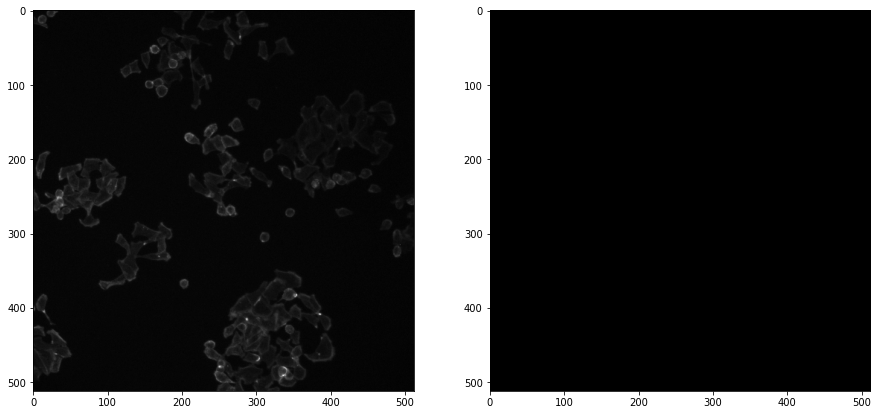

In [98]:
im_labels_1 = segmentation.slic(img_gamma_adj, compactness=25, n_segments=1000)

g = graph.rag_mean_color(img_gamma_adj, im_labels_1, mode='similarity')
im_labels = graph.cut_threshold(im_labels_1, g, 45)
im_labels = img_as_ubyte(label2rgb(im_labels))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='gray')

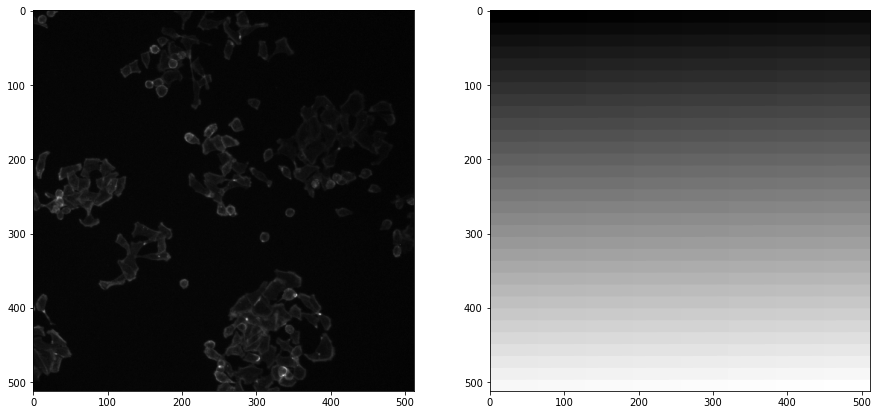

In [99]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels_1, cmap='gray')

Watershed

C:\Users\hamma\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 120 fits in uint8
  return _convert(image, np.uint8, force_copy)


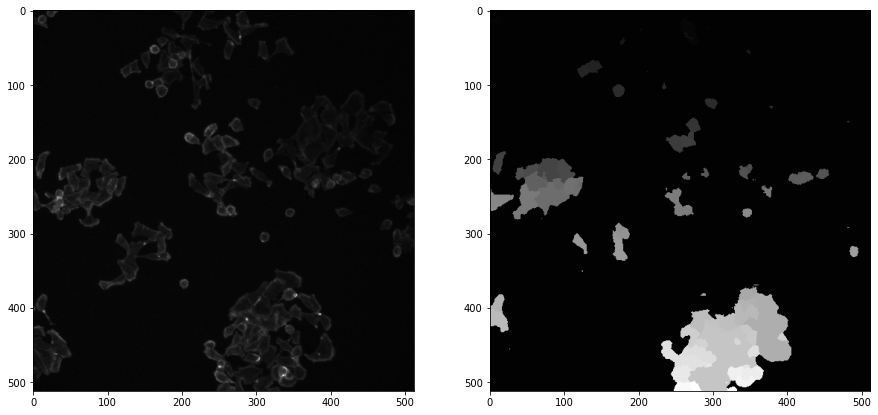

In [116]:
imd = rank.median(im, disk(1))
imm = rank.gradient(imd, disk(5)) < 10
imm = ndi.label(imm)[0]
img = rank.gradient(imd, disk(2))
im_labels = watershed(img, imm)
im_labels = img_as_ubyte(im_labels)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(im_labels, cmap='gray')

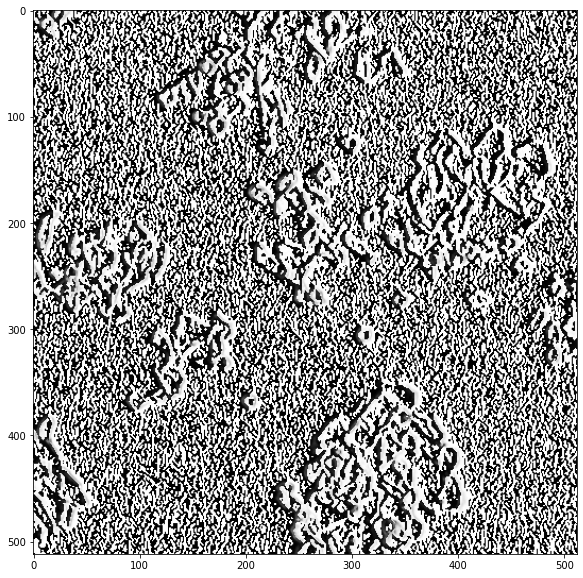

In [106]:
plt.figure(figsize=(10, 10))
#plt.imshow(sobel(im), cmap='gray')
plt.imshow(rank.median(sobel(im), footprint=morphology.square(2)), cmap='gray')

#rank.median(sobel(im), footprint=morphology.square(5))